# Graph theory with Python and NetworkX

*Introduction to Computational Neuroscience, Charles University, Winter 2025-26*

*Tutor: Dr. Aitor Morales-Gregorio*

In [1]:
# This cell imports all the packages you need to complete this exercises
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

## Exercise 1
Let each person be represented by one node and whether they are good friends be defined by shared hobbies. Each person in this example has three hobbies and if two people have the same hobby then they are definitely friends (i.e. they are connected). Let's create and analyze a friendship graph!

Using the given list of people (nodes) and hobbies (properties of the nodes):
* **Exercise 1.1.** Create an undirected graph and draw it.
   * Connect two people if they share at least one hobby.
   * Do not connect people to themselves.
   * `HINT`: Use a double for loop to compare every person to each other and add edges to the graph. 
   * `HINT`: Use `np.in1d()` to check if any element of one array can be found in another array.
   
   
* **Exercise 1.2.** Use pandas to print the adjacency matrix of the graph.
    * `OPTIONAL` Is it symmetric? Compare the upper (`np.triu`) and lower (`np.tril`) triangles of the adjacency matrix.
    
    
* **Exercise 1.3.** Calculate the degree of each person (node) and make a bar plot.
* **Exercise 1.4.** Calculate the local clustering coefficient for each person (node).
* **Exercise 1.5.** `Roke` would really like to talk to `Ekaitz` (for undisclosed reasons). What is the shortest sequence of common friends between `Roke` and `Ekaitz`? i.e. the shortest path in the graph. Plot the graph and highlight the shortest path (as we did in the tutorial).

DISCLAIMER: None of these are real people, all data was randomly generated.

In [2]:
# Use this list of Basque names as your nodes
people = ['Edurne', 'Ane', 'Maider', 'Idoia', 'Ugutz', 'Onintza', 
          'Aitzol', 'Berezi', 'Ainhoa', 'Hodei', 'Bittor', 'Unai', 
          'Alazne', 'Etor', 'Itxaso', 'Aimar', 'Roke', 'Iker', 
          'Eneritz', 'Xabier', 'Amaia', 'Ekaitz', 'Nerea']

# This are the hobbies for each person, 
# the order of hobbies is the same as the order of people in the list, 
# each person has 3 hobbies (grouped in a numpy array)
hobbies = [
    np.array(['watching birds', 'rock lifting', 'reading']),
    np.array(['trekking', 'theater', 'gaming']),
    np.array(['gaming', 'rock lifting', 'cooking']),
    np.array(['badminton', 'rock lifting', 'dancing']),
    np.array(['origami', 'theater', 'tennis']),
    np.array(['rock lifting', 'sung poetry', 'origami']),
    np.array(['trekking', 'tennis', 'gaming']),
    np.array(['parkour', 'gaming', 'cycling']),
    np.array(['gardening', 'gaming', 'origami']),
    np.array(['cooking', 'football', 'reading']),
    np.array(['scuba diving', 'basketball', 'parkour']),
    np.array(['dancing', 'coffee tasting', 'badminton']),
    np.array(['scuba diving', 'knitting', 'trekking']),
    np.array(['badminton', 'trekking', 'cycling']),
    np.array(['tennis', 'badminton', 'skateboarding']),
    np.array(['reading', 'gaming', 'scuba diving']),
    np.array(['scuba diving', 'football', 'reading']),
    np.array(['trekking', 'gardening', 'tennis']),
    np.array(['origami', 'badminton', 'parkour']),
    np.array(['watching birds', 'cycling', 'reading']),
    np.array(['watching birds', 'parkour', 'knitting']),
    np.array(['sung poetry', 'tennis', 'origami']),
    np.array(['reading', 'dancing', 'cycling'])]

Text(0.5, 1.0, 'Degree of each person in the friendship graph')

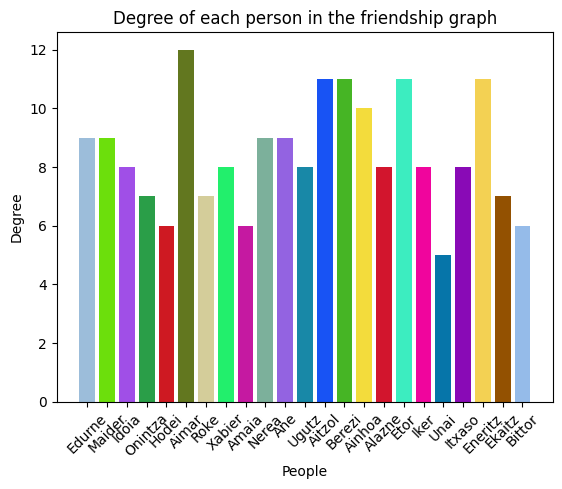

In [3]:
G = nx.DiGraph()

for i1, p1 in enumerate(people):
    for i2, p2 in enumerate(people):
        if i1 != i2:
            hobbies_p1 = hobbies[people.index(p1)]
            hobbies_p2 = hobbies[people.index(p2)]
            common_hobbies = np.intersect1d(hobbies_p1, hobbies_p2)
            if len(common_hobbies) > 0:
                G.add_edge(p1, p2)
df = nx.to_pandas_adjacency(G)
df["degree"] = df.sum(axis=1)
degrees = df["degree"]
df.drop(["degree"], axis=1, inplace=True)

plt.bar(df.columns, degrees, color=["#" + "".join(random.choices("0123456789ABCDEF", k=6)) for _ in df.columns])
plt.xticks(rotation=45)
plt.xlabel("People")
plt.ylabel("Degree")
plt.title("Degree of each person in the friendship graph")

In [4]:
cluster_dict = nx.clustering(G)
print(cluster_dict)
print(nx.shortest_path(G, source="Roke", target="Ekaitz"))

{'Edurne': 0.4722222222222222, 'Maider': 0.4722222222222222, 'Idoia': 0.4642857142857143, 'Onintza': 0.5238095238095238, 'Hodei': 0.8, 'Aimar': 0.45454545454545453, 'Roke': 0.6190476190476191, 'Xabier': 0.5714285714285714, 'Amaia': 0.4, 'Nerea': 0.5, 'Ane': 0.6111111111111112, 'Ugutz': 0.6428571428571429, 'Aitzol': 0.5272727272727272, 'Berezi': 0.43636363636363634, 'Ainhoa': 0.5555555555555556, 'Alazne': 0.42857142857142855, 'Etor': 0.4, 'Iker': 0.6428571428571429, 'Unai': 0.8, 'Itxaso': 0.5714285714285714, 'Eneritz': 0.36363636363636365, 'Ekaitz': 0.7142857142857143, 'Bittor': 0.5333333333333333}
['Roke', 'Edurne', 'Onintza', 'Ekaitz']


## Exercise 2
Let's analyze the connectivity in the marmoset monkey (*Callithrix jacchus*) neocortex. In a recent study, [Majka et al 2020](https://www.nature.com/articles/s41467-020-14858-0) used retrograde axonal tracing to measure the cortico-cortical connectivity in the marmoset monkey. This allows us to build an edge complete graph (a graph where we know whether all edges exist or not) for 55 cytoarchitectonic cortical areas (out of 116 areas described by the authors).

The marmoset cortical connectivity graph is **weighted** and **directed**. The weights are expressed as the fraction of labelled neurons (FLN) that result from each tracer injection and the direction is a defining feature of neural connections. 

All the data can be explored in a [dedicated website ](https://analytics.marmosetbrain.org/) that the authors created and is available under a Creative Commons (CC-BY 4.0) license.

Let us build a graph out of the connectivity data and analize it.
* **Exercise 2.1.** Load the data, build a `NetworkX` weighted and directed graph, and plot it.
    * The adjacency matrix is available as `adjacency_marmoset.csv`, which can be read with pandas (loading is provided already).
    * `HINT`: you can build a networkX graph from pandas adjacency with `nx.convert_matrix.from_pandas_adjacency`. Be patient, this can be a bit slow to build.
    * Check that you have created a `nx.DiGraph`, not a `nx.Graph`, by checking that the adjacency matrix is not symmetric.

In [5]:
# This is how you can load the adjacency matrix
A = pd.read_csv('adjacency_marmoset.csv', index_col='Source')
A.head()

G1 = nx.from_pandas_adjacency(A, create_using=nx.DiGraph())

np.alltrue(nx.adjacency_matrix(G1).todense() == nx.adjacency_matrix(G1).todense().T)

False

For now let's not consider the connectivity weight, only whether connections exist:
* **Exercise 2.2.** Would you say the marmoset cortex graph has small-world properties? Small-world graphs have:
    * low density (number of connections / total possible connections),
    * high mean local clustering coefficients,
    * and short path lengths. 

In [6]:
nx.density(G1) # 0.6242424 -- small world network
np.mean(list(nx.clustering(G1).values())) # avg clustering 0.75 -- highly clustered
nx.average_shortest_path_length(G1) # 1.376 -- really short paths

sum(dict(nx.degree(G1)).values()) // len(G1.nodes())  # avg degree 67


67

Still ignoring the weights:
* **Exercise 2.3.** What is the degree distribution of the network? 
    * `HINT` Use `plt.hist` to plot the degree distribution.

(array([4., 2., 1., 8., 5., 9., 6., 4., 9., 7.]),
 array([28. , 34.8, 41.6, 48.4, 55.2, 62. , 68.8, 75.6, 82.4, 89.2, 96. ]),
 <BarContainer object of 10 artists>)

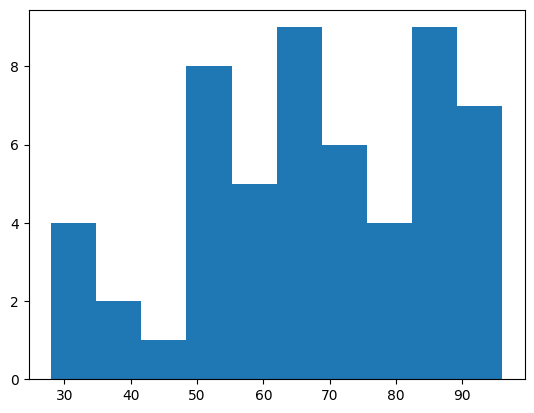

In [14]:
d = dict(nx.degree(G1))
plt.hist(list(d.values()), bins=10)

Still ignoring the weights:
* **Exercise 2.4.** There are 2 area pairs whose shortest paths are 3 jumps from each other (i.e. there are 3 edges and 2 nodes in the shortest path between those areas, `shortest_path_length=3`), can you find them?
    * `WARNING` This exercise pushes the limits of data structures, it uses generators, tuples, dicts and combinations thereof! Make sure to print out your variables at different steps to know what is going on and do not hesistate to `ask for help`!
    * `OPTIONAL`: plot the 2 shortest paths between those nodes

In [19]:
apsp = nx.all_pairs_shortest_path(G1)
list(apsp)

[('A1-2',
  {'A1-2': ['A1-2'],
   'A10': ['A1-2', 'A10'],
   'A11': ['A1-2', 'A11'],
   'A19DI': ['A1-2', 'A19DI'],
   'A23a': ['A1-2', 'A23a'],
   'A23b': ['A1-2', 'A23b'],
   'A23c': ['A1-2', 'A23c'],
   'A24d': ['A1-2', 'A24d'],
   'A3a': ['A1-2', 'A3a'],
   'A3b': ['A1-2', 'A3b'],
   'A45': ['A1-2', 'A45'],
   'A47L': ['A1-2', 'A47L'],
   'A4ab': ['A1-2', 'A4ab'],
   'A4c': ['A1-2', 'A4c'],
   'A6DC': ['A1-2', 'A6DC'],
   'A6DR': ['A1-2', 'A6DR'],
   'A6M': ['A1-2', 'A6M'],
   'A6Va': ['A1-2', 'A6Va'],
   'A8C': ['A1-2', 'A8C'],
   'A8aV': ['A1-2', 'A8aV'],
   'A8b': ['A1-2', 'A8b'],
   'AIP': ['A1-2', 'AIP'],
   'AuCM': ['A1-2', 'AuCM'],
   'AuML': ['A1-2', 'AuML'],
   'AuRT': ['A1-2', 'AuRT'],
   'MST': ['A1-2', 'MST'],
   'OPt': ['A1-2', 'OPt'],
   'PE': ['A1-2', 'PE'],
   'PEC': ['A1-2', 'PEC'],
   'PF': ['A1-2', 'PF'],
   'PFG': ['A1-2', 'PFG'],
   'PG': ['A1-2', 'PG'],
   'PGM': ['A1-2', 'PGM'],
   'PGa-IPa': ['A1-2', 'PGa-IPa'],
   'S2E': ['A1-2', 'S2E'],
   'TPO': ['A1-2', 

Let's consider the connection weights (FLN) for the rest of the exercise:
* **Exercise 2.5.** Caculate the following metrics: 
    * In-degrees (in-intensity)
    * Out-degrees (out-intensity)
    * Ratio between in- and out-degree
    * Local clustering
    * Betweenness centrality
    * `OPTIONAL`: plot these metrics either on top of your graph with color or as separate barplots

In [ ]:
# * In-degrees (in-intensity)

# * Out-degrees (out-intensity)
# * Ratio between in- and out-degree
# * Local clustering
# * Betweenness centrality
# * `OPTIONAL`: plot these metrics either on top of your graph with color or as separate barplots

## Exercise 3
Small-world networks have a small clustering coefficient and short path lengths. 

[Watts and Strogatz 1998](https://www.nature.com/articles/30918) proposed a model to create random networks with these properties based on iteratively rewiring of a ring-like graph. Their model is capable of creating small-world networks. Unfortunately, this model creates graphs with a rather uniform degree distribution, which is not very realistic. Many "real" empirical graphs are scale-free, i.e. they have an exponentially decaying degree distribution. Finding efficient and simple graph generating algorithms that resemble experimentally observed graphs (small-world, scale-free, motif distribution...) remains an active area of graph theory research.

The Watts–Strogatz model is constructed in two steps. Let us implement their graph generating function using the following parameters:

In [ ]:
# Use the parameters defined in this cell

# Fixed randomness so we all create the same graphs
seed = 99
np.random.seed(seed)

# Parameters of the graph generating model
n = 100  # Number of nodes in the graph
k = 6  # Number of neighbours each node will have initially (must be even)
p = 0.2  # Probability of rewiring each edge

* **Exercise 3.1.** Build a ring lattice graph with $n=100$ nodes connected to $k=6$ neighbours. Following these steps:
    * Create an undirected graph
    * Add $n$ nodes numbered as $i=0,...,n-1$
    * for each node $i$, connect $i$ to its $k$ neighbours, but not to itself. That is, connect $i$ to all nodes in $j = [(i-k/2)\ {\rm mod}\ n,\ (i+k/2)\ {\rm mod}\ n]$, where $j \neq i$
    * `HINT`. Don't be scared by the modulus ($\rm mod$)! It is just the remainder of a division, we use it here so that when we connect $i=99$ we do not try to connect to $j \geq 100$ (which are not nodes of our graph!). The modulus just fixes this problem and closes the circle: e.g. $101\ {\rm mod}\ 100 = 1$, $102\ {\rm mod}\ 100 = 2$ etc. In python the modulus is as simple as using a `%`! *(Example in next code cell)*
    * After creating your ring simply draw it with `nx.draw()`

In [ ]:
# Examples of what the modulus does and how to use it in python
print('-3 % 100 =', -3 % 100)
print('53 % 100 =', 53 % 100)
print('101 % 100 =', 101 % 100)

* **Exercise 3.2.** Rewire your ring using the given probability $p=0.2$. Now follow this steps (indentation indicates nested conditions/loops):
    * for all nodes $i$, find all the right-hand neighbours $j=(i,\ (i+k/2)\ {\rm mod}\ n]$, where $j \neq i$ 
        * for all the $j$ right-hand neighbours of $i$, 
            * Draw a random probality and if it is $< p$, 
                * remove the edge $(i,j)$ and
                * create a new edge to a random node $u$,
                * self loops are not allowed, $u \neq i$
                * the edge $(i,u)$ must not exist, `G.has_edge()` is your friend
                * if $u = i$ or the edge $(i,u)$ already exist, get a new $u$ until you find a valid edge, add that edge to your graph
 

* **Exercise 3.3.** Calculate and show the degree distribution, mean clustering and mean shortest path lengths of your Watts-Strogatz graph.

* `OPTIONAL` **Exercise 3.4.** Use the `NetworkX` built in Watts-Strogatz graph generating function and compare it to your graph. Use the same random seed. 
    * Show the degree distribution, mean clustering and shortest path lengths
    * `NOTE` Even though we have a fixed the random seed, slightly different implementations (with a different order of calling `np.random`) will lead to slightly different results.